In [ ]:
Cross Selling Recomendation:

Problem Statement:  XYZ credit union in Latin America is performing very well in selling the Banking products (eg: Credit card, deposit account, retirement account, safe deposit box etc) but their existing customer is not not buying more than 1 product which means bank is not performing good in cross selling (Bank is not able to sell their other offerings to existing customer). XYZ Credit Union decided to approach ABC analytics to solve their problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load Dataset
train_data= pd.read_csv(r'C:\Users\Subhendu\OneDrive\Desktop\excelAllFiles\Cross__Selling\Cross _Selling\Train.csv',sep=',',index_col=False,dtype='unicode')
train_data

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0,33,1,...,0,0,0,0,0,0,0,0,0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0,33,1,...,0,0,0,0,0,0,0,0,0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0,33,1,...,0,0,0,0,0,0,0,0,0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0,33,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(train_data.head())

   fecha_dato ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28  1375586            N              ES    H   35  2015-01-12   
1  2015-01-28  1050611            N              ES    V   23  2012-08-10   
2  2015-01-28  1050612            N              ES    V   23  2012-08-10   
3  2015-01-28  1050613            N              ES    H   22  2012-08-10   
4  2015-01-28  1050614            N              ES    V   23  2012-08-10   

  ind_nuevo antiguedad indrel  ... ind_hip_fin_ult1 ind_plan_fin_ult1  \
0         0          6      1  ...                0                 0   
1         0         35      1  ...                0                 0   
2         0         35      1  ...                0                 0   
3         0         35      1  ...                0                 0   
4         0         35      1  ...                0                 0   

  ind_pres_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1 ind_valo_fin_ult1  \
0                 0  

In [4]:
train_data.shape

(13647309, 48)

In [5]:
#deleting unnessasary columns
train_data.drop('ult_fec_cli_1t',axis=1, inplace=True)
train_data.drop('conyuemp',axis=1, inplace=True)
train_data.drop('ind_aval_fin_ult1',axis=1, inplace=True)

In [10]:
print(train_data.columns)

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'segmento', 'ind_ahor_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')


In [6]:
column_mapping = {
    'fecha_dato': 'record_date',
    'ncodpers': 'customer_id',
    'ind_empleado': 'employee_status',
    'pais_residencia': 'country_of_residence',
    'sexo': 'gender',
    'age': 'age',
    'fecha_alta': 'customer_since',
    'ind_nuevo': 'new_customer_index',
    'antiguedad': 'seniority_months',
    'indrel': 'primary_relationship_type',
    'indrel_1mes': 'last_primary_relationship',
    'tiprel_1mes': 'customer_type_last_month',
    'indresi': 'residence_flag',
    'indext': 'foreigner_flag',
    'canal_entrada': 'customer_acquisition_channel',
    'indfall': 'deceased_flag',
    'tipodom': 'address_type',
    'cod_prov': 'province_code',
    'nomprov': 'province_name',
    'ind_actividad_cliente': 'active_customer_flag',
    'renta': 'household_income',
    'segmento': 'customer_segment',
    'ind_ahor_fin_ult1': 'savings_account',
    'ind_cco_fin_ult1': 'current_account',
    'ind_cder_fin_ult1': 'derivada_account',
    'ind_cno_fin_ult1': 'payroll_account',
    'ind_ctju_fin_ult1': 'junior_account',
    'ind_ctma_fin_ult1': 'mas_particular_account',
    'ind_ctop_fin_ult1': 'particular_account',
    'ind_ctpp_fin_ult1': 'particular_plus_account',
    'ind_deco_fin_ult1': 'short_term_deposit',
    'ind_deme_fin_ult1': 'medium_term_deposit',
    'ind_dela_fin_ult1': 'long_term_deposit',
    'ind_ecue_fin_ult1': 'e-account',
    'ind_fond_fin_ult1': 'funds',
    'ind_hip_fin_ult1': 'mortgage',
    'ind_plan_fin_ult1': 'pensions',
    'ind_pres_fin_ult1': 'loans',
    'ind_reca_fin_ult1': 'tax_payments',
    'ind_tjcr_fin_ult1': 'credit_card',
    'ind_valo_fin_ult1': 'securities',
    'ind_viv_fin_ult1': 'home_account',
    'ind_nomina_ult1': 'payroll',
    'ind_nom_pens_ult1': 'pension',
    'ind_recibo_ult1': 'direct_debit'
}

# Applying the column name changes in data
train_data.rename(columns=column_mapping, inplace=True)


In [7]:
print(train_data.columns)

Index(['record_date', 'customer_id', 'employee_status', 'country_of_residence',
       'gender', 'age', 'customer_since', 'new_customer_index',
       'seniority_months', 'primary_relationship_type',
       'last_primary_relationship', 'customer_type_last_month',
       'residence_flag', 'foreigner_flag', 'customer_acquisition_channel',
       'deceased_flag', 'address_type', 'province_code', 'province_name',
       'active_customer_flag', 'household_income', 'customer_segment',
       'savings_account', 'current_account', 'derivada_account',
       'payroll_account', 'junior_account', 'mas_particular_account',
       'particular_account', 'particular_plus_account', 'short_term_deposit',
       'medium_term_deposit', 'long_term_deposit', 'e-account', 'funds',
       'mortgage', 'pensions', 'loans', 'tax_payments', 'credit_card',
       'securities', 'home_account', 'payroll', 'pension', 'direct_debit'],
      dtype='object')


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 45 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   record_date                   object
 1   customer_id                   object
 2   employee_status               object
 3   country_of_residence          object
 4   gender                        object
 5   age                           object
 6   customer_since                object
 7   new_customer_index            object
 8   seniority_months              object
 9   primary_relationship_type     object
 10  last_primary_relationship     object
 11  customer_type_last_month      object
 12  residence_flag                object
 13  foreigner_flag                object
 14  customer_acquisition_channel  object
 15  deceased_flag                 object
 16  address_type                  object
 17  province_code                 object
 18  province_name                 object
 19

In [9]:
train_data['residence_flag']=train_data['residence_flag'].replace('S','Yes').replace('N','No')
train_data['residence_flag'].value_counts()

residence_flag
Yes    13553711
No        65864
Name: count, dtype: int64

In [10]:

# Count missing values for all columns
missing_values = train_data.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(train_data)) * 100

# Create a DataFrame to display both count and percentage
missing_data = pd.DataFrame({"Missing Values": missing_values, "Missing Percentage": missing_percentage})

print(missing_data)


                              Missing Values  Missing Percentage
record_date                                0            0.000000
customer_id                                0            0.000000
employee_status                        27734            0.203220
country_of_residence                   27734            0.203220
gender                                 27804            0.203732
age                                        0            0.000000
customer_since                         27734            0.203220
new_customer_index                     27734            0.203220
seniority_months                           0            0.000000
primary_relationship_type              27734            0.203220
last_primary_relationship             149781            1.097513
customer_type_last_month              149781            1.097513
residence_flag                         27734            0.203220
foreigner_flag                         27734            0.203220
customer_acquisition_chan

In [11]:
# Check the data types of the columns
print(train_data.dtypes)



record_date                     object
customer_id                     object
employee_status                 object
country_of_residence            object
gender                          object
age                             object
customer_since                  object
new_customer_index              object
seniority_months                object
primary_relationship_type       object
last_primary_relationship       object
customer_type_last_month        object
residence_flag                  object
foreigner_flag                  object
customer_acquisition_channel    object
deceased_flag                   object
address_type                    object
province_code                   object
province_name                   object
active_customer_flag            object
household_income                object
customer_segment                object
savings_account                 object
current_account                 object
derivada_account                object
payroll_account          

In [12]:
# Convert relevant columns to numeric
numeric_columns = ['age', 'seniority_months', 'household_income', 'payroll', 'pension', 'direct_debit']

for col in numeric_columns:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce')


In [18]:
print(train_data.dtypes)


record_date                      object
customer_id                      object
employee_status                  object
country_of_residence             object
gender                           object
age                             float64
customer_since                   object
new_customer_index               object
seniority_months                float64
primary_relationship_type        object
last_primary_relationship        object
customer_type_last_month         object
residence_flag                   object
foreigner_flag                   object
customer_acquisition_channel     object
deceased_flag                    object
address_type                     object
province_code                    object
province_name                    object
active_customer_flag             object
household_income                float64
customer_segment                 object
savings_account                  object
current_account                  object
derivada_account                 object


In [13]:
import warnings
warnings.simplefilter("ignore")


In [14]:
#Fill Missing Values (Imputation)
train_data["province_code"].fillna(train_data["province_code"].mode()[0], inplace=True)
train_data["household_income"].fillna(train_data["household_income"].median(), inplace=True)  


In [15]:
import warnings
warnings.simplefilter("ignore")

In [17]:
#For categorical columns, use mode
train_data["gender"].fillna(train_data["gender"].mode()[0], inplace=True)
train_data["customer_segment"].fillna(train_data["customer_segment"].mode()[0], inplace=True)


In [18]:
train_data.dropna(subset=["customer_acquisition_channel"], inplace=True)


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13461183 entries, 0 to 13647307
Data columns (total 45 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   record_date                   object 
 1   customer_id                   object 
 2   employee_status               object 
 3   country_of_residence          object 
 4   gender                        object 
 5   age                           float64
 6   customer_since                object 
 7   new_customer_index            object 
 8   seniority_months              float64
 9   primary_relationship_type     object 
 10  last_primary_relationship     object 
 11  customer_type_last_month      object 
 12  residence_flag                object 
 13  foreigner_flag                object 
 14  customer_acquisition_channel  object 
 15  deceased_flag                 object 
 16  address_type                  object 
 17  province_code                 object 
 18  province_name            

In [20]:
train_data.isnull().sum()

record_date                         0
customer_id                         0
employee_status                     0
country_of_residence                0
gender                              0
age                                 0
customer_since                      0
new_customer_index                  0
seniority_months                    0
primary_relationship_type           0
last_primary_relationship          72
customer_type_last_month           72
residence_flag                      0
foreigner_flag                      0
customer_acquisition_channel        0
deceased_flag                       0
address_type                        0
province_code                       0
province_name                   65620
active_customer_flag                0
household_income                    0
customer_segment                    0
savings_account                     0
current_account                     0
derivada_account                    0
payroll_account                     0
junior_accou

In [21]:
import warnings
warnings.simplefilter("ignore")

In [24]:
train_data['last_primary_relationship'].fillna('Unknown', inplace=True)
train_data['customer_type_last_month'].fillna('Unknown', inplace=True)


In [25]:
import warnings
warnings.simplefilter("ignore")

In [26]:
train_data['payroll'].fillna(train_data['payroll'].mode()[0], inplace=True)
train_data['pension'].fillna(train_data['pension'].mode()[0], inplace=True)


In [27]:
import warnings
warnings.simplefilter("ignore")

In [28]:
train_data['province_name'] = train_data['province_name'].fillna(method='ffill')


In [29]:
train_data.isnull().sum()

record_date                     0
customer_id                     0
employee_status                 0
country_of_residence            0
gender                          0
age                             0
customer_since                  0
new_customer_index              0
seniority_months                0
primary_relationship_type       0
last_primary_relationship       0
customer_type_last_month        0
residence_flag                  0
foreigner_flag                  0
customer_acquisition_channel    0
deceased_flag                   0
address_type                    0
province_code                   0
province_name                   0
active_customer_flag            0
household_income                0
customer_segment                0
savings_account                 0
current_account                 0
derivada_account                0
payroll_account                 0
junior_account                  0
mas_particular_account          0
particular_account              0
particular_plu

In [30]:
train_data.duplicated().sum()

0

In [31]:
train_data['age'] = pd.to_numeric(train_data['age'], errors='coerce')
train_data['seniority_months'] = pd.to_numeric(train_data['seniority_months'], errors='coerce')
train_data['household_income'] = pd.to_numeric(train_data['household_income'], errors='coerce')


In [32]:
unique_value = train_data.nunique()
print("Number of unique values:\n{}".format(unique_value))

Number of unique values:
record_date                         17
customer_id                     938316
employee_status                      5
country_of_residence               118
gender                               2
age                                120
customer_since                    6753
new_customer_index                   2
seniority_months                   258
primary_relationship_type            2
last_primary_relationship            9
customer_type_last_month             5
residence_flag                       2
foreigner_flag                       2
customer_acquisition_channel       162
deceased_flag                        2
address_type                         1
province_code                       52
province_name                       52
active_customer_flag                 2
household_income                519964
customer_segment                     3
savings_account                      2
current_account                      2
derivada_account                     2


In [36]:
print("Unique values in each categorical column:")
for col in train_data.select_dtypes(include=[object]):
    print(col,":", train_data[col].unique())

Unique values in each categorical column:
record_date : ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
customer_id : ['1375586' '1050611' '1050612' ... '1178553' '1175116' '1164094']
employee_status : ['N' 'A' 'B' 'F' 'S']
country_of_residence : ['ES' 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN'
 'GW' 'OM' 'CG' 'LV' 'LT' 'ML' 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD'
 'BZ' '

In [37]:
train_data.describe()

,age,seniority_months,household_income,payroll,pension,direct_debit
count,1.346118e+07,1.346118e+07,1.346118e+07,1.346118e+07,1.346118e+07,1.346118e+07
mean,4.024752e+01,7.733650e+01,1.278499e+05,5.536326e-02,6.012495e-02,1.295556e-01
std,1.715972e+01,1.681596e+03,2.071576e+05,2.286879e-01,2.377182e-01,3.358139e-01
min,2.000000e+00,-9.999990e+05,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.400000e+01,2.300000e+01,7.610586e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.900000e+01,5.100000e+01,1.018500e+05,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+01,1.360000e+02,1.381542e+05,0.000000e+00,0.000000e+00,0.000000e+00
max,1.640000e+02,2.560000e+02,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00


In [38]:
import warnings
warnings.simplefilter("ignore")

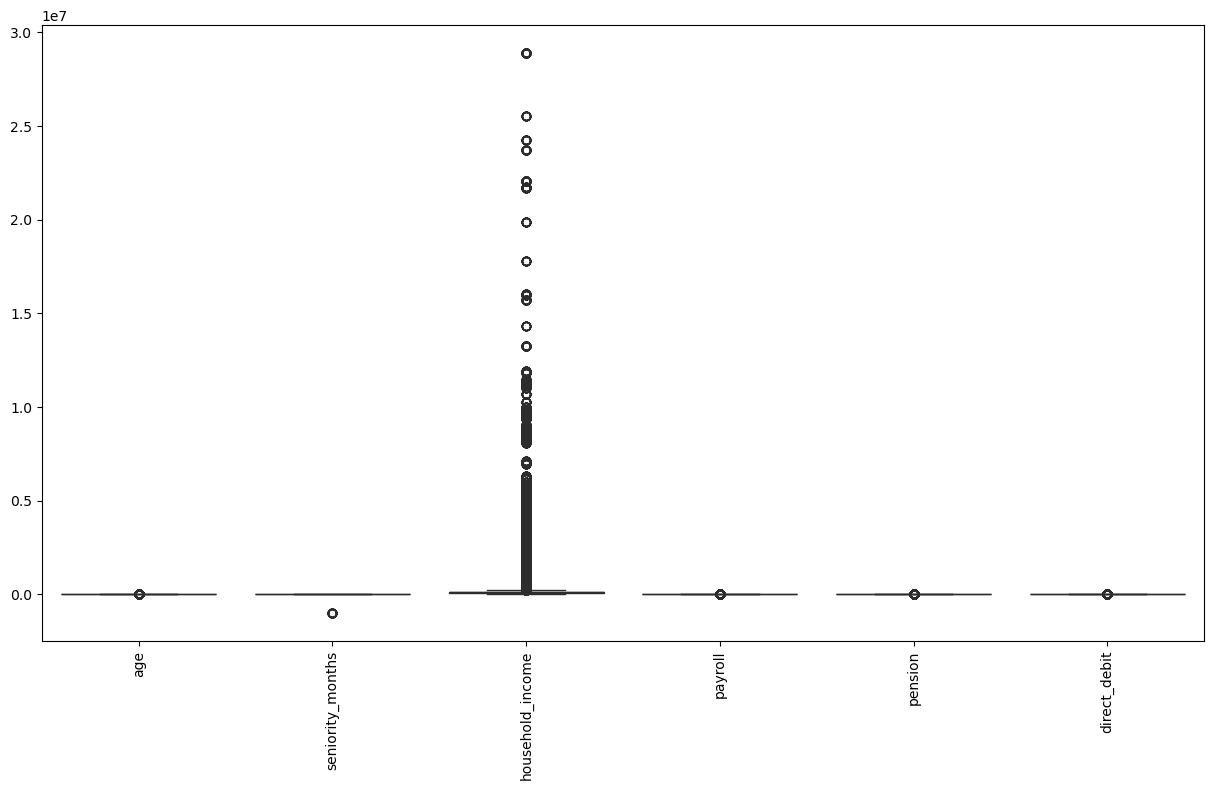

In [35]:
numeric_columns = train_data.select_dtypes(include=['number'])
numeric_columns = train_data.select_dtypes(include=['number']).copy()
# Select up to 10 numerical columns (modify based on available columns)
numeric_cols_sample = numeric_columns.iloc[:, :10]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_cols_sample, palette='BuPu')
plt.xticks(rotation=90)
plt.show()

